In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.text import *

In [3]:
df_train = pd.read_csv('base_treino.csv',sep='|',encoding='utf-8')
df_train.head()

,Arquivo,indicacao,indication,ATC_1,ATC_2,ATC_3,ATC_4
0,bula2179,Este pomada é indicada para o alívio das manif...,This ointment is indicated for the relief of i...,D,D07,D07B,D07B1
1,bula96,Replenine-VF é indicado no tratamento de episó...,Replenine-VF is indicated for the treatment of...,B,B02,B02D,B02D2
2,bula1835,Hipertensão captopril é indicado para o tratam...,Hypertension Captopril is indicated for the tr...,C,C09,C09A,C09A0
3,bula1590,Transpulmin xarope é um expectorante destinado...,Transpulmin syrup is an expectorant intended f...,R,R05,R05C,R05C0
4,bula4244,Dutasterida trata e previne a progressão da hi...,Dutasterida treats and prevents the progressio...,G,G04,G04C,G04C3


In [4]:
df_valid= pd.read_csv('base_teste.csv',sep='|',encoding='utf-8')
df_valid.head()

,Arquivo,indicacao,indication,ATC_1,ATC_2,ATC_3,ATC_4
0,bula292,Cloridrato de ranitidina é indicado no tratame...,Hydrochloride Ranitidina is indicated for the ...,A,A02,A02B,A02B1
1,bula7742,"Hipercolesterolemia Primária ezetimiba, admini...","Primary Hypercholesterolaemia ezetimibe, admin...",C,C10,C10A,C10A9
2,bula2854,SURVANTAr beractanto é destinado à prevenção e...,SURVANTAr Beractant is intended for the preven...,R,R07,R07C,R07C0
3,bula2326,GASTROBENE está indicado para - distúrbios da ...,GASTROBENE is indicated for-disorders of gastr...,A,A03,A03F,A03F0
4,bula3390,Hidrofluxr é destinado ao tratamento da hipert...,HYDROFLUXR is intended for the treatment of ar...,C,C03,C03A,C03A3


In [5]:
data_lm = TextLMDataBunch.from_df('.',train_df=df_train,
                                  valid_df=df_valid,text_cols='indication',
                                  label_cols='ATC_1')

In [6]:
data_lm.show_batch()

idx,text
0,"dermatitis , xxmaj dermatitis , stase dermatitis and anogenital pruritus . xxbos xxmaj xxunk - xxup xxunk is indicated for the treatment of hemorrhagic episodes and in the maintenance of plasma levels of factor xxup ix in patients diagnosed with haemophilia xxup b. xxbos xxmaj hypertension xxmaj captopril is indicated for the treatment of hypertension , because it reduces blood pressure in these cases . xxmaj heart xxmaj failure xxmaj"
1,"tinea manuum , tinea corporis , tinea inguinalis , xxmaj pityriasis versicolor . xxmaj additionally xxmaj canestenr xxmaj cream is indicated for the treatment of infections of the external genitals and adjacent areas in the woman , as well as inflammation of the glans and foreskin of the sexual partner caused by yeast xxmaj vulvitis and balanitis by xxmaj candida . xxbos xxmaj this xxmaj medicine is an antiseptic of"
2,"urticaria , such as pruritus , and reduction in the size and number of rashes . xxbos xxmaj piperacillin sodium xxmaj tazobactam xxmaj sodium is indicated for the treatment of the following systemic and / or local bacterial infections caused by xxmaj gram - positive and xxmaj gram - negative aerobic and anaerobic microorganisms susceptible to piperacillin / tazobactam or to xxmaj piperacillin xxmaj adult xxmaj patients 1 . xxmaj"
3,allergic rhinitis or seasonal contact dermatitis atopic dermatitis xxmaj serum diseases hypersensitivity reactions to xxmaj drugs . -ophthalmic xxmaj diseases xxmaj acute and severe chronic inflammatory and allergic xxmaj processes involving the eye and its attachments as marginal allergic ulcers of the corneal herpes zoster ophthalmic inflammation of the anterior segment xxmaj choriditis and posterior diffuse uvete ophthalmomia xxmaj sympathetic conjunctivitis allergic keratitis xxmaj chorioretinitis optic neuritis iritis and iridocylites
4,"over time . xxmaj where available , local sensitivity data should be consulted . xxmaj when necessary , microbiological sampling tests and sensitivity tests should be performed . xxbos xxmaj the betamethasone valerate of gentamicin tolnafate clioquinol sulfate is indicated for the relief of inflammatory manifestations of corticosteroid - responsive dermatoses , when complicated by secondary infection caused by microorganisms xxmaj sensitive to the components of its formulation or when"


In [7]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult = 0.5, callback_fns=ShowGraph)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


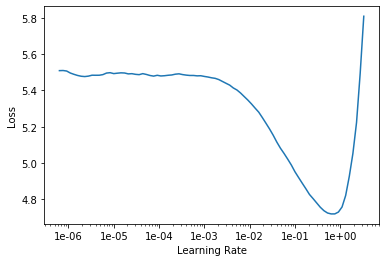

In [8]:
learn_lm.lr_find()
learn_lm.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,3.754050,2.930654,0.439672,00:10
1,2.694757,2.081370,0.562629,00:10
2,2.068678,1.690992,0.636049,00:10
3,1.744671,1.581154,0.663711,00:10
4,1.671901,1.572959,0.672132,00:10
5,1.645840,1.602995,0.672184,00:10
6,1.670175,1.624139,0.676408,00:10
7,1.682845,1.625721,0.677129,00:10
8,1.704134,1.641040,0.680752,00:10
9,1.677566,1.617408,0.685783,00:10


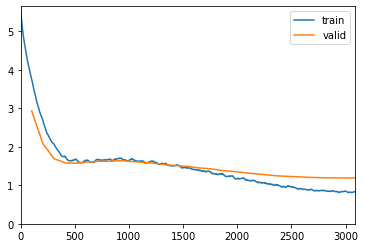

Better model found at epoch 0 with accuracy value: 0.43967199325561523.
Better model found at epoch 1 with accuracy value: 0.5626288056373596.
Better model found at epoch 2 with accuracy value: 0.6360491514205933.
Better model found at epoch 3 with accuracy value: 0.6637105345726013.
Better model found at epoch 4 with accuracy value: 0.6721324920654297.
Better model found at epoch 5 with accuracy value: 0.6721841096878052.
Better model found at epoch 6 with accuracy value: 0.6764079332351685.
Better model found at epoch 7 with accuracy value: 0.6771291494369507.
Better model found at epoch 8 with accuracy value: 0.6807520985603333.
Better model found at epoch 9 with accuracy value: 0.6857829689979553.
Better model found at epoch 10 with accuracy value: 0.6927283406257629.
Better model found at epoch 11 with accuracy value: 0.6996822953224182.
Better model found at epoch 12 with accuracy value: 0.7073317170143127.
Better model found at epoch 13 with accuracy value: 0.7134014964103699.
B

In [9]:
max_lr = 6e-2
learn_lm.fit_one_cycle(30, max_lr=max_lr, moms=(0.8,0.7),
                       callbacks=[callbacks.SaveModelCallback(learn_lm, every='improvement', monitor='accuracy', name='learn_lm')])

In [10]:
#Carrego a melhor versão do language model
learn_lm.load('learn_lm')
learn_lm.save_encoder('enc')

In [11]:
data_clas = TextClasDataBunch.from_df('.',train_df=df_train,
                                      valid_df=df_valid,
                                      text_cols='indication',
                                      label_cols='ATC_1')
data_clas.save('data_clas')

In [12]:
data_clas.show_batch()

text,target
"xxbos xxmaj simethicone is indicated for the relief of symptoms in the case of excess gases in the gastrointestinal tract constituting a cause of pain or cramps intestinais1 , such as - meteorismo1-eructação1-borborigmos1-post - surgical xxmaj aerophagia 1-distension xxmaj abdominal1- xxmaj flatulencya1 knowing that the gases in the digestive tract disrupt the abdominal imaging exams and the xxmaj simethicone facilitates the elimination of gases , this medication can be used",A
"xxbos xxup decadron injectable is intended for the treatment of conditions in which the anti - inflammatory and immunosuppressive effects of corticosteroids are desired , especially for intensive treatment during shorter periods . xxmaj specific xxmaj indications xxup a. xxmaj by intravenous or intramuscular injection , when oral therapy is not feasible primary adrenocortical xxmaj insufficiency injectable xxup decadron has predominantly glucocorticoid activity , with low activity xxmaj mineralocorticoid .",H
"xxbos xxmaj neo xxmaj gentamicin xxmaj solution for xxmaj injection is indicated for the treatment of infections caused by strains of susceptible bacteria of the following xxmaj microorganisms xxmaj pseudomonas aeruginosa , xxmaj proteus xxmaj sp . xxmaj indole - xxmaj positive and xxmaj indole - xxmaj negative , xxmaj escherichia coli , xxmaj klebsiella - xxmaj enterobacter - xxmaj serratia xxmaj sp . xxmaj citrobacter xxmaj sp . xxmaj",J
"xxbos xxmaj gentamicin sulfate of xxmaj gentamicin is indicated for the treatment of infections caused by strains of susceptible bacteria of the following microorganisms xxmaj pseudomonas aeruginosa , xxmaj proteus sp . indol - xxmaj positive and indol - negative , xxmaj escherichia coli , xxmaj klebsiella - xxmaj enterobacter - xxmaj serratia sp . , xxmaj citrobacter sp . , xxmaj providencia sp . , xxmaj staphylococcus sp .",J
"xxbos hytamicinar xxmaj injectable is indicated for the treatment of infections caused by strains of susceptible bacteria from the following microorganisms xxmaj pseudomonas aeruginosa , xxmaj proteus sp . indol - xxmaj positive and xxunk , xxmaj escherichia coli , xxunk - xxmaj serratia sp . , xxmaj citrobacter sp . , xxmaj providencia sp . , xxmaj staphylococcus sp . coagulase - xxmaj positive and coagulase - negative and",J


In [13]:
learn_clas = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3, callback_fns=ShowGraph)
learn_clas.load_encoder('enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (4827 items)
x: TextList
xxbos xxmaj this ointment is indicated for the relief of inflammatory manifestations of corticosteroid sensitive dermatoses complicated by secondary infection caused by bacteria susceptible to gentamicin , or when there is suspicion of such infections . xxmaj these dermatoses include psoriasis , allergic contact dermatitis eczema , atopic dermatitis , neurodermatitis circumscrited lichen simplex chronic , lichen planus , erythematous intertrigo , xxmaj pompholyx dehydrorosis , seborrheic dermatitis , exfoliative dermatitis , xxmaj dermatitis , stase dermatitis and anogenital pruritus .,xxbos xxmaj xxunk - xxup xxunk is indicated for the treatment of hemorrhagic episodes and in the maintenance of plasma levels of factor xxup ix in patients diagnosed with haemophilia xxup b.,xxbos xxmaj hypertension xxmaj captopril is indicated for the treatment of hypertension , because it reduces blood pressure in these cases

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


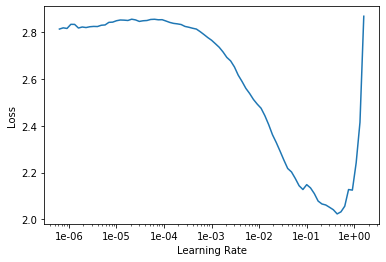

In [14]:
learn_clas.lr_find()
learn_clas.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.518436,0.838098,0.836785,00:07
1,1.066992,0.548916,0.883181,00:07
2,0.847248,0.437471,0.899751,00:08
3,0.659907,0.422335,0.890638,00:07
4,0.651314,0.395192,0.903065,00:08
5,0.595671,0.393285,0.893952,00:08
6,0.606827,0.414940,0.893123,00:08
7,0.599738,0.394565,0.893952,00:07
8,0.537085,0.352561,0.908865,00:07
9,0.555457,0.367895,0.905551,00:09


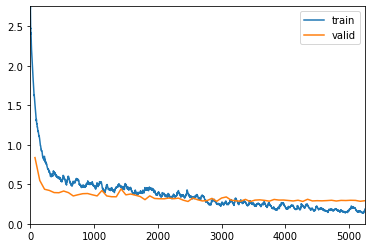

Better model found at epoch 0 with accuracy value: 0.8367854356765747.
Better model found at epoch 1 with accuracy value: 0.8831814527511597.
Better model found at epoch 2 with accuracy value: 0.8997514247894287.
Better model found at epoch 4 with accuracy value: 0.9030654430389404.
Better model found at epoch 8 with accuracy value: 0.9088649749755859.
Better model found at epoch 15 with accuracy value: 0.9121789336204529.
Better model found at epoch 16 with accuracy value: 0.9179784655570984.
Better model found at epoch 17 with accuracy value: 0.9188069701194763.
Better model found at epoch 20 with accuracy value: 0.9204639792442322.
Better model found at epoch 23 with accuracy value: 0.9345484375953674.
Better model found at epoch 33 with accuracy value: 0.9353769421577454.
Better model found at epoch 35 with accuracy value: 0.9411764740943909.
Better model found at epoch 38 with accuracy value: 0.9420049786567688.
Better model found at epoch 43 with accuracy value: 0.942833483219146

In [15]:
max_lr = 2e-2
learn_clas.fit_one_cycle(70, max_lr=max_lr , moms=(0.8,0.7), callbacks=[callbacks.SaveModelCallback(learn_clas, every='improvement', monitor='accuracy', name='learn_clas')])

In [16]:
learn_clas.load('learn_clas')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (4827 items)
x: TextList
xxbos xxmaj this ointment is indicated for the relief of inflammatory manifestations of corticosteroid sensitive dermatoses complicated by secondary infection caused by bacteria susceptible to gentamicin , or when there is suspicion of such infections . xxmaj these dermatoses include psoriasis , allergic contact dermatitis eczema , atopic dermatitis , neurodermatitis circumscrited lichen simplex chronic , lichen planus , erythematous intertrigo , xxmaj pompholyx dehydrorosis , seborrheic dermatitis , exfoliative dermatitis , xxmaj dermatitis , stase dermatitis and anogenital pruritus .,xxbos xxmaj xxunk - xxup xxunk is indicated for the treatment of hemorrhagic episodes and in the maintenance of plasma levels of factor xxup ix in patients diagnosed with haemophilia xxup b.,xxbos xxmaj hypertension xxmaj captopril is indicated for the treatment of hypertension , because it reduces blood pressure in these cases

In [17]:
interp = ClassificationInterpretation.from_learner(learn_clas)

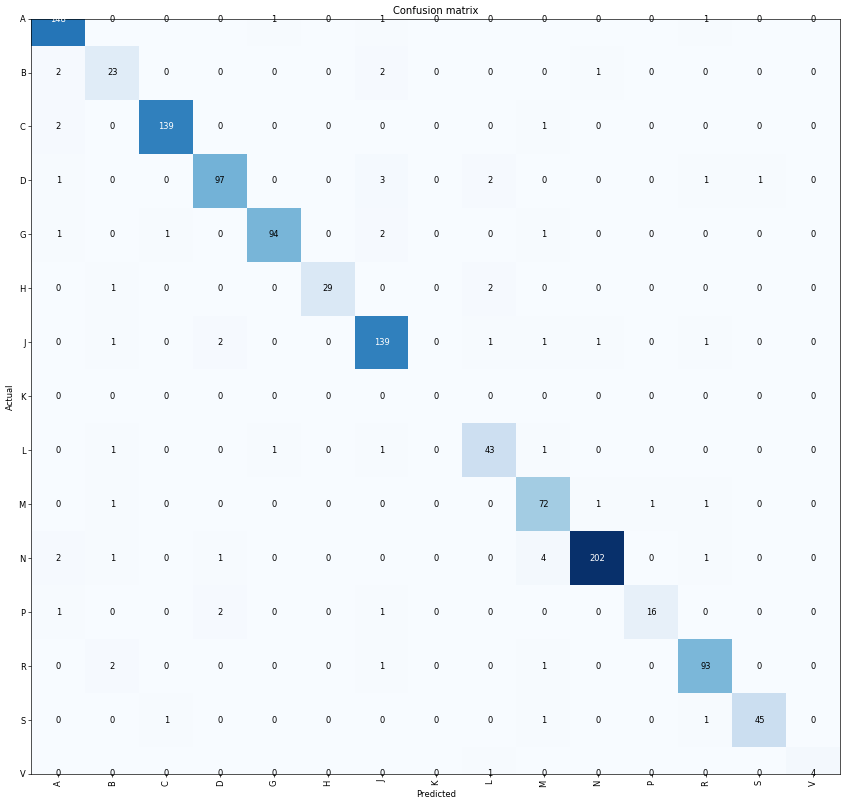

In [20]:
interp.plot_confusion_matrix(figsize=(14,14), dpi=60)